In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

In [2]:
data1 = pd.read_csv('F:\Learn Python\Data\ACCIDENTS_GU_BCN_2013.csv')
data1.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')

In [3]:
data1 ['Date'] ='2013-'+data1['Mes de any'].apply(lambda x:str(x))+'-'+data1['Dia de mes'].apply(lambda x:str(x))

In [4]:
data1.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)', 'Date'],
      dtype='object')

In [5]:
data1.head()

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X),Date
0,2013S007360,-1,Desconegut,-1--1--1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,Tarda,Desconegut,0,1,0,1,2,-1,-1,2013-10-16
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41",2013-10-29
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09",2013-7-23
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26",2013-2-26
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76",2013-11-18


In [6]:
data1[['Date']].head()

,Date
0,2013-10-16
1,2013-10-29
2,2013-7-23
3,2013-2-26
4,2013-11-18


In [7]:
# data1['Date'] = pd.to_datetime(data1['Date'])
acc = data1.groupby(['Date']).size()
acc[:10]

Date
2013-1-1     16
2013-1-10    31
2013-1-11    27
2013-1-12    17
2013-1-13    10
2013-1-14    21
2013-1-15    30
2013-1-16    29
2013-1-17    27
2013-1-18    31
dtype: int64

In [8]:
acc.mean()

25.90958904109589

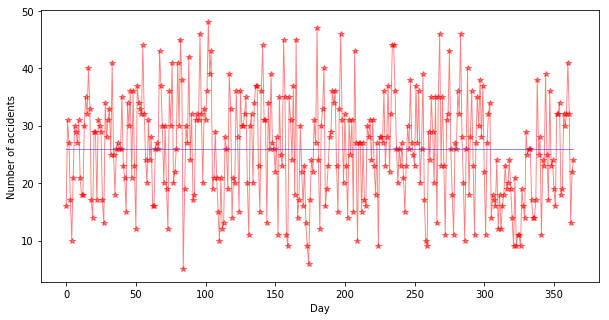

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
plt.xlabel('Day')
plt.ylabel('Number of accidents')

plt.plot(range(0,365),np.array(acc),'r-*',lw=0.9,alpha=0.5)
plt.plot(range(0,365),[acc.mean()]*365,'b-',lw=0.9,alpha=0.5)
plt.show()

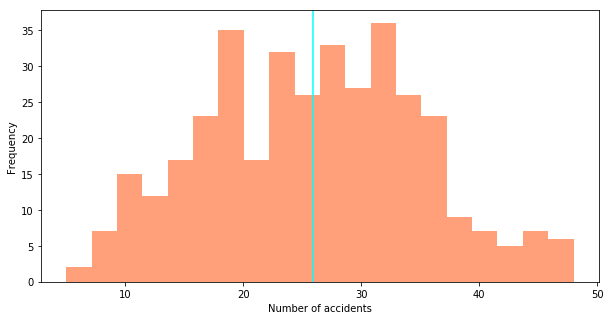

In [10]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
plt.xlabel('Number of accidents')
plt.ylabel('Frequency')
plt.hist(np.array(acc),bins=20,color='lightsalmon')
ax.axvline(x=acc.mean(),ymin=0,ymax=40,color=[0,1,1])
plt.show()

In [11]:
print("Mean: ",acc.mean(),"Standard Deviation: ",acc.std())

Mean:  25.90958904109589 Standard Deviation:  9.108324962464703


In [12]:
# population
df = acc.to_frame()
N_test = 10000
elements = 200
# mean array of samples
means = [0]*N_test
# sample generation
for i in range ( N_test ):
    rows = np.random.choice(df.index.values,elements)
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()


In [13]:
row = np.random.choice(df.index.values,200)
sampled_df=df.loc[row]
est_sigma_mean=sampled_df.std()/math.sqrt(200)
print('Direct estimation of SE from one sample of 200 elements',est_sigma_mean[0])
print('Estimating of the SE by simulating 10000 samples of 200 elements: ',np.array(means).std())

Direct estimation of SE from one sample of 200 elements 0.676354401466
Estimating of the SE by simulating 10000 samples of 200 elements:  0.636058269271


In [14]:
def mean_bootstrap(x,numb):
    y=[0]*numb
    for i in range(numb):
        sample=[x[j] for j in np.random.choice(len(x),size=len(x))]
        y[i]=np.mean(sample)
    return y
xbar = mean_bootstrap(acc,1000)
print("Mean estimate : ",np.mean(xbar))

Mean estimate :  25.9126164384


In [15]:
m=acc.mean()
se=acc.std()/math.sqrt(len(acc))
conf_int=[m-se*1.96,m+se*1.96]
print("Confidence Interval: ",conf_int)

Confidence Interval:  [24.975156065800284, 26.8440220163915]


In [16]:
xbar = mean_bootstrap(acc,1000)
sample_mean = np.mean(xbar)
sample_se = np.std(xbar)
print("Mean estimate: ",sample_mean)
print("SE of the estimate: ",sample_se)
conf_int = [np.percentile(xbar,2.5),np.percentile(xbar,97.5)]
print("Confidence Interval:",conf_int)

Mean estimate:  25.8981150685
SE of the estimate:  0.464226980156
Confidence Interval: [24.986232876712329, 26.824863013698629]


In [17]:
data2 = pd.read_csv('F:\Learn Python\Data\ACCIDENTS_GU_BCN_2010.csv')
data2.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')

In [18]:
# Create a new column which is the date
data2['Date'] ='2010-'+data2['Mes de any'].apply(lambda x:str(x))+'-'+data2['Dia de mes'].apply(lambda x:str(x))

In [19]:
data2.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)', 'Date'],
      dtype='object')

In [20]:
data2[['Date']].head()

,Date
0,2010-5-28
1,2010-11-8
2,2010-2-25
3,2010-8-3
4,2010-12-24


In [21]:
# Hypothesis Test

data1_date = data1 ['Date']
count2013= data1['Date'].value_counts()
print('2013: Mean',count2013.mean())

data2_date = data2['Date']
count2010= data2['Date'].value_counts()
print('2010 : Mean',count2010.mean())

2013: Mean 25.90958904109589
2010 : Mean 24.81095890410959


In [22]:
n = len(count2013)
m = len(count2010)
mean_2013 = count2013.mean()
mean_2010 = count2010.mean()
s1 = count2013.std()
s2 = count2010.std()
conf_int1= [mean_2013 - s1*1.96/np.sqrt(n),mean_2013 + s1*1.96/np.sqrt(n)]
conf_int2= [mean_2010 - s2*1.96/np.sqrt(m),mean_2010 + s2*1.96/np.sqrt(m)]
print('2010 accident rate estimate :' , count2010.mean ())
print('2013 accident rate estimate :' , count2013.mean ())
print('Conf interval for 2013:' ,conf_int1)
print('Conf interval for 2010:' ,conf_int2)

2010 accident rate estimate : 24.81095890410959
2013 accident rate estimate : 25.90958904109589
Conf interval for 2013: [24.975156065800284, 26.844022016391499]
Conf interval for 2010: [23.932871944107148, 25.689045864112032]


In [23]:
# Hypothesis Test using P-value

n = len(count2010)
m = len(count2013)
p = (count2013.mean()-count2010.mean())
print('m:' , m, 'n:' , n)
print('mean difference : ' , p)

m: 365 n: 365
mean difference :  1.0986301369863014


In [24]:
# pooling distributions
x=count2010
y=count2013
pool = np.concatenate([x,y])
np.random.shuffle(pool)

# sample generation
import random
N=1000
dif = list(range(N))
for i in range(N):
    p1=[random.choice(pool) for _ in list(range(n))]
    p2=[random.choice(pool) for _ in list(range(n))]
    dif[i]=(np.mean(p1)-np.mean(p2))

In [25]:
dif2=np.array(dif)
w1=np.where(dif2>p)[0]
print('p-value (Simulation) = ',len(w1)/float(N),'(',len(w1)/float(N)*100,'% ), ','Difference = ',p)
if(len(w1)/float(N))<0.05:
    print('The effect is likely')
else:
    print('The effect is unlikely')

p-value (Simulation) =  0.046 ( 4.6 % ),  Difference =  1.0986301369863014
The effect is likely
